In [122]:
# Import libraries:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [123]:
# Function that calculates the discount-rates sum:
def deltasumlog(i, n, delta):
    output = []
    while i <= n:
        otemp = delta**i
        output += [otemp]
        i += 1
    return sum(output)

def deltasumsqrt(i, n, delta):
    output = []
    while i <=n:
        otemp = (delta**(2*i))
        output += [otemp]
        i += 1
    return sum(output)


# Function that calculates the quality-yield of a certain amount of effort:
def qualitycalc(effort):
    threshold = 0.70
    if  0 <= effort <= threshold:
        quality = effort / threshold
    #elif effort > -0.5 and effort < 0.5:
    elif effort > threshold and effort <= 1:
        quality = (1/(1-threshold))*(1-effort)
    else:
        quality = 0
    return quality
    

# Function that calculates all Efforts in all periods for a certain deadline
# Parameters: induced deadline, output plots?, type of utility function, print contributions?
def contributioncalc(deadline, plots, uftype, printcontri):    
    strtemp = f"df_{deadline}"
    locals()[strtemp] = pd.DataFrame()

    period = 0
    j = 0
    indexlist = []
    while j <= deadline:
        indexlist += [j]
        j += 1
    locals()[strtemp]['Period'] = indexlist

    locals()[strtemp]['Period'] = indexlist

    while period <= deadline:
        contlist = []
        i = period
        z = 0
        v = 1
        while z < period:
            contlist += [locals()[strtemp].iloc[z,v]]
            z += 1
            v += 1

        if uftype == "log":
            cont = 1 - ( ( (deadline + 1 - i) - (w - sum(contlist)) ) / (1 + beta * deltasumlog(1, deadline - i,delta)) )
        if uftype == "sqrt":
            cont = 1 - ( ( (deadline + 1 - i) - (w - sum(contlist)) ) / (1 + (beta**2) * deltasumsqrt(1, deadline - i, delta)) )

        contlist += [cont]
        i += 1

        while i <= deadline:
            if uftype == "log":
                calcu = (1-(1-cont)*(beta*(delta**(i-period))))
            if uftype == "sqrt":
                calcu = (1-(1-cont)*((beta**2)*(delta**(2*(i-period)))))

            contlist += [calcu]
            i += 1
        
        if printcontri == True:
            print(f"Period {period}: {contlist}, {sum(contlist)}")
        
        locals()[strtemp][f'C_P{period}'] = contlist
        if period == deadline:
            cltemp = contlist
        x = 0
        while x < period:
            locals()[strtemp].iloc[x,period+1] = None
            x += 1
        period += 1
    if plots == True:
        plot = locals()[strtemp].plot(x = 'Period', marker = '.', markersize = 3,)#.legend(bbox_to_anchor=(1.0, 1.0))
        plt.xticks(numpy.arange(min(locals()[strtemp]['Period']), max(locals()[strtemp]["Period"])+1, 1.0))
        ##### plt.savefig(f"ab2.png", dpi = 1200)
         ##colormap = 'hot') title = f"Effort decisions by period for deadline = {deadline}; delta = {delta}; beta = {beta}; W = {w}; Utilitytype = {uftype}",
        #plot



    return cltemp     

In [124]:
# Assign Variables

delta = 0.90        # Discount Factor
beta = 0.9          # Temporal Bias
w = 4               # Required accumulated Effort
r = 1.03            # Opportunity cost of a less tight deadline for the organization

print(f"delta = {delta}; beta = {beta}; w = {w};")

delta = 0.9; beta = 0.9; w = 4;


Period 0: [0.1374065655612824, 0.43405244766475726, 0.5415824826084534, 0.6286818109128472, 0.6992322668394062, 0.756378136139919, 0.8026662902733344], 4.0
Period 1: [0.1374065655612824, 0.3421575459846987, 0.5683895659205607, 0.6503955483956543, 0.7168203942004799, 0.7706245193023887, 0.8142058606349348], 3.9999999999999996
Period 2: [0.1374065655612824, 0.3421575459846987, 0.5012738836115003, 0.6727857950375052, 0.7349564939803792, 0.7853147601241073, 0.8261049557005269], 4.0
Period 3: [0.1374065655612824, 0.3421575459846987, 0.5012738836115003, 0.6253495342715211, 0.754191829435545, 0.8008953818427914, 0.8387252592926611], 4.0
Period 4: [0.1374065655612824, 0.3421575459846987, 0.5012738836115003, 0.6253495342715211, 0.7228908946488307, 0.8181887159790978, 0.8527328599430692], 4.0
Period 5: [0.1374065655612824, 0.3421575459846987, 0.5012738836115003, 0.6253495342715211, 0.7228908946488307, 0.8012931440868104, 0.8696284318353563], 4.0
Period 6: [0.1374065655612824, 0.3421575459846987,

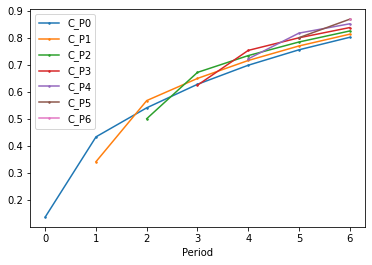

In [125]:
plottest1 = contributioncalc(6, True, "sqrt", True)


In [126]:
# Interesting Plots:
# plottest1 = contributioncalc(8, True, "sqrt", True)
# plottest2 = contributioncalc(8, True, "log", False)
# plottest3 = contributioncalc(4, True, "sqrt", False)
# plottest4 = contributioncalc(4, True, "log", False)

    deadline   quality  logquality  sqrtquality  profitslog  profitssqrt  \
0          4  3.156779    1.149552     1.776733    1.021362     1.578604   
1          5  4.129609    1.418183     2.032144    1.223337     1.752945   
2          6  4.315179    1.462139     2.077301    1.224518     1.739707   
3          7  4.358059    1.472027     2.087597    1.196893     1.697407   
4          8  4.463576    1.495950     2.112718    1.180917     1.667799   
5          9  4.734722    1.554923     2.175942    1.191719     1.667678   
6         10  4.854806    1.579969     2.203362    1.175645     1.639509   
7         11  5.126986    1.634518     2.264285    1.180811     1.635768   
8         12  5.237181    1.655783     2.288489    1.161333     1.605100   
9         13  5.478504    1.700832     2.340620    1.158184     1.593849   
10        14  5.632337    1.728524     2.373254    1.142758     1.569001   
11        15  5.731983    1.746062     2.394156    1.120731     1.536718   
12        16

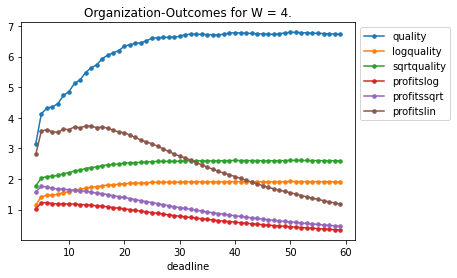

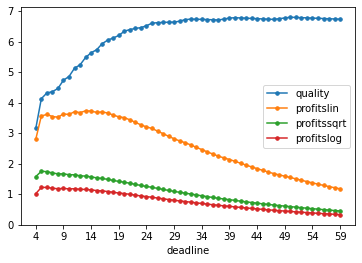

In [127]:
qualitydf = pd.DataFrame()
deadlinelist = []
qualitylist = []

t = int(w) # + 1
b = 60

while t < b:
    quallist = [qualitycalc(i) for i in contributioncalc(t, False, "sqrt", False)]
    
    # The minimum of total quality is set equal to 1 in order to ensure fitting graph dimensions
    if sum(quallist) > 1:
        qualsum = sum(quallist)
    else:
        qualsum = 1
    qualitylist += [qualsum]
    deadlinelist += [t]
    t += 1

sqrtquality = [i**0.5 for i in qualitylist]
logquality = [numpy.log(i) for i in qualitylist]

qualitydf['deadline'] = deadlinelist
qualitydf['quality'] = qualitylist
qualitydf['logquality'] = logquality
qualitydf['sqrtquality'] = sqrtquality

rows = len(qualitydf)
profitlist = []
profitlistsq = []
profitslinear = []
f = 0

while f < rows:
    dlin = qualitydf.iloc[f,0]
    lqual = qualitydf.iloc[f,2]
    squal = qualitydf.iloc[f,3]
    linqual = qualitydf.iloc[f,1]
    profitlog = ((1/(r**dlin))*lqual)
    profitsqrt = ((1/(r**dlin))*squal)
    profitslin = ((1/(r**dlin))*linqual)
    profitlist += [profitlog]
    profitlistsq += [profitsqrt]
    profitslinear += [profitslin]
    f += 1

qualitydf['profitslog'] = profitlist
qualitydf['profitssqrt'] = profitlistsq
qualitydf['profitslin'] = profitslinear

qualitydf['quality'] = pd.to_numeric(qualitydf['quality'])



qualitydf.plot(x = 'deadline', marker = '.', markersize = 7, title = f"Organization-Outcomes for W = {w}.").legend(bbox_to_anchor=(1.0, 1.0))

qualitydf.plot(x = 'deadline', y= ['quality', 'profitslin', 'profitssqrt', 'profitslog'], marker = '.', markersize = 7, )#.legend(bbox_to_anchor=(1.0, 1.0)) #title = f"Organization-Outcomes for W = {w}."
plt.xticks(numpy.arange(min(qualitydf["deadline"]), max(qualitydf["deadline"])+1, 5.0))
plt.yticks(numpy.arange(0, max(qualitydf["quality"])+1, 1.0))
plt.savefig("qualityprofitsw4all.png", dpi = 1200)

print(qualitydf)

maxprofit = qualitydf['profitslog'].idxmax()
maxprofitsq = qualitydf['profitssqrt'].idxmax()
optimaldeadlinelog = qualitydf.iloc[maxprofit,0]
optimaldeadlinesqrt = qualitydf.iloc[maxprofitsq,0]

print(f"Log: The optimal Deadline is: {optimaldeadlinelog}, so  {optimaldeadlinelog + 1} Periods.")
print(f"Sqrt: The optimal Deadline is: {optimaldeadlinesqrt}, so {optimaldeadlinesqrt + 1} Periods.")